# Projeto para redução de dimensionalidade em imagens.

<h3> Seguindo o exemplo do algoritmo de binarização apresentado em nossa última aula, realize a implementação em Python para transformar uma imagem colorida para níveis de cinza (0 a 255) e para binarizada (0 e 255), preto e branco. <h3/>    

* **Para a implementação, será necessário criar a solução sem utilizar bibliotecas como opencv, ou seja, elaborar o código.**
* **Por meio da imagem é possível visualizar os dois casos esperados:**

<img src="..\img\lena.png" align='center' alt="drawing" width="603" heigth="221"/>

## Solução do Desafio

In [4]:
# libs para carregar e tratar a imagem
from PIL import Image
import numpy as np

# Para exibir a imagem dentro do jupyter notebook
from IPython.display import display

Formato da imagem: PNG
Modo da imagem: RGB
Dimensões da imagem: (512, 512)


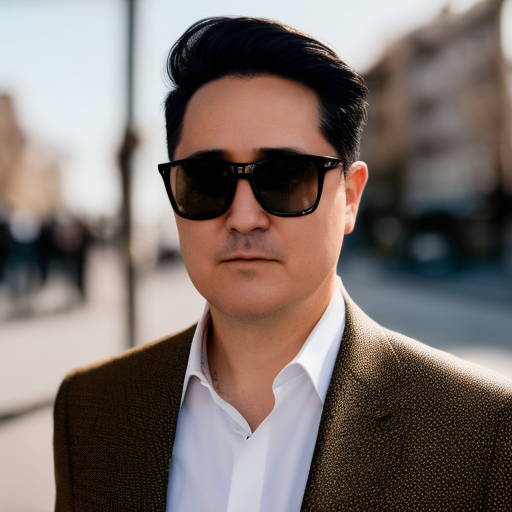

In [6]:
# Caminho para a imagem
image_path = '../img/img.png'

# Carregar a imagem usando a PIL
image = Image.open(image_path)

# Exibir informações sobre a imagem
print("Formato da imagem:", image.format)
print("Modo da imagem:", image.mode)
print("Dimensões da imagem:", image.size)

# Exibir a imagem
display(image)

* **Imagem carregada com sucesso, agora vamos criar o código para converter a imagem em escala de cinza.**

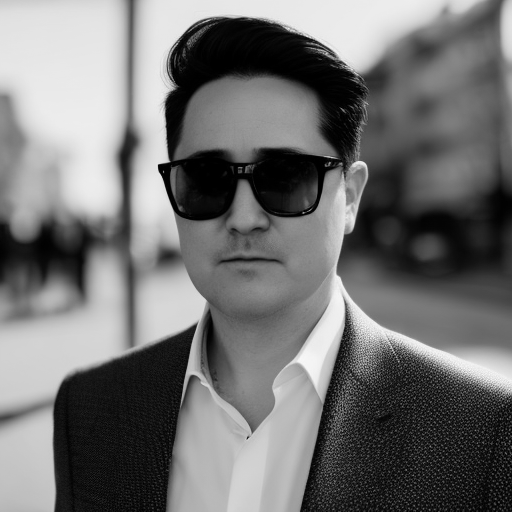

In [15]:
# Converter a imagem para um array NumPy
image_array = np.array(image)

# Obter as dimensões da imagem
height, width, _ = image_array.shape

# Criar uma nova matriz para a imagem em escala de cinza
gray_array = np.zeros((height, width), dtype=np.uint8)

# Converter a imagem para escala de cinza
for i in range(height):
    for j in range(width):
        # Obter os valores RGB do pixel
        r, g, b = image_array[i, j]

        # Calcular o valor de escala de cinza usando a média ponderada dos canais RGB
        # link de pesquisa dos valoers: https://capivararex.wordpress.com/2016/04/17/dip02-conversao-rgb-para-escala-de-cinza/
        gray_value = int(0.3 * r + 0.59 * g + 0.11 * b)

        # Atribuir o valor de escala de cinza ao pixel correspondente na nova matriz
        gray_array[i, j] = gray_value

# Criar uma nova imagem a partir da matriz de escala de cinza
gray_image = Image.fromarray(gray_array, mode='L')

# Exibir a imagem em escala de cinza
display(gray_image)

**Observação:** 
* Veja como é simples realizar a conversão utilizando a biblioteca **PIL**.

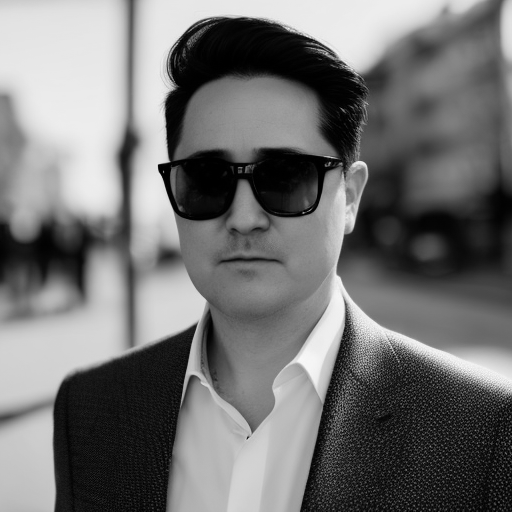

In [9]:
# Criar uma nova imagem a partir da matriz de escala de cinza
gray_image = image.convert('L')

# Exibir a imagem em escala de cinza
display(gray_image)


**Agora vamos converter a imagem em escala cinza para preto e branca**.

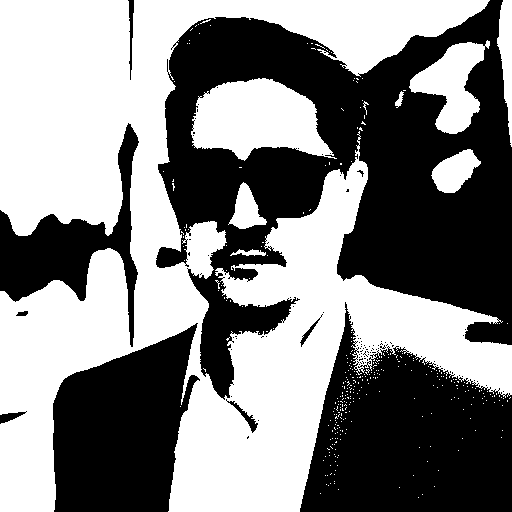

In [19]:
# Converter a imagem em escala de cinza para um array NumPy
gray_array = np.array(gray_image)

# Definir o valor de limiar
threshold = 110

# Criar uma nova matriz para a imagem em preto e branco
bw_array = np.zeros_like(gray_array, dtype=np.uint8)

# Converter a imagem em escala de cinza para preto e branco
bw_array[gray_array < threshold] = 0  # Valor do pixel preto
bw_array[gray_array >= threshold] = 255  # Valor do pixel branco

# Criar uma nova imagem a partir da matriz em preto e branco
bw_image = Image.fromarray(bw_array, mode='L')

# Exibir a imagem em preto e branco
display(bw_image)



**O valor de limiar(threshold) é definido como 110. Pixels com valores menores que o limiar serão considerados como preto, enquanto pixels com valores maiores ou iguais ao limiar serão considerados como branco. É possível alterar esse valor afim de encontrar a melhor proporção em preto e branco.**

### Salvando as imagens.

In [28]:
# Salvar a imagem em escala de cinza
gray_image.save('../img/imagem_cinza.png')

# Salvar a imagem em preto e branco
bw_image.save('../img/imagem_pb.png')


### Comparando o tamanho das imagens

In [33]:
import os

# Obter o tamanho do arquivo da imagem colorida
size_color = os.path.getsize('../img/img.png')
size_mb_color = size_color / (1024 * 1024)  # Converter para megabytes

# Obter o tamanho do arquivo da imagem em escala de cinza
size_gray = os.path.getsize('../img/imagem_cinza.png')
size_mb_gray = size_gray / (1024 * 1024)  # Converter para megabytes

# Obter o tamanho do arquivo da imagem em preto e branco
size_bw = os.path.getsize('../img/imagem_pb.png')
size_mb_bw = size_bw / (1024 * 1024)  # Converter para megabytes

# Exibir o tamanho das imagens em megabytes
print("Tamanho da imagem colorida: {:.2f} MB".format(size_mb_color))
print("Tamanho da imagem em escala de cinza: {:.2f} MB".format(size_mb_gray))
print("Tamanho da imagem em preto e branco: {:.2f} MB".format(size_mb_bw))


Tamanho da imagem colorida: 0.36 MB
Tamanho da imagem em escala de cinza: 0.12 MB
Tamanho da imagem em preto e branco: 0.01 MB


### A redução é um processo fundamental na visão computacional por várias razões:

* **Eficiência computacional**: A redução permite diminuir a quantidade de dados de entrada, tornando os algoritmos de visão computacional mais eficientes. Ao reduzir o tamanho das imagens ou a dimensionalidade dos dados, é possível economizar recursos computacionais, como tempo de processamento e armazenamento.

* **Eliminação de ruído e detalhes irrelevantes:** Em muitos casos, a redução pode ajudar a eliminar ruídos indesejados nas imagens ou detalhes irrelevantes para a análise ou tarefa em questão. Ao reduzir a informação desnecessária, é possível melhorar a qualidade dos dados e a eficácia dos algoritmos.

* **Extração de características:** A redução pode ser usada para extrair características importantes e representativas dos dados. Por exemplo, técnicas de redução de dimensionalidade, como a Análise de Componentes Principais (PCA) ou a Análise de Discriminante Linear (LDA), podem ajudar a identificar as características mais discriminantes e relevantes nos dados.

* **Simplificação da representação:** Reduzir a complexidade dos dados pode facilitar sua representação e interpretação. Imagens de alta resolução ou dados de alta dimensionalidade podem ser difíceis de visualizar e compreender. A redução ajuda a simplificar a representação dos dados, tornando-os mais acessíveis e compreensíveis.

* **Robustez e generalização:** A redução pode ajudar a melhorar a robustez e a generalização dos modelos de visão computacional. Ao reduzir a dimensionalidade ou a complexidade dos dados, é possível evitar overfitting e aumentar a capacidade dos modelos de generalizar padrões e características para novos dados não vistos anteriormente.